In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('Ford_Focus_data')

In [3]:
df = df.drop('Unnamed: 0', axis=1)

In [4]:
df

,Make,Model,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
0,Ford,Focus,550,NaN,2007,Hatchback,"105,030",1.6,99BHP,Manual,Petrol,9.0,ULEZ
1,Ford,Focus,750,NaN,2008,Hatchback,"161,000",1.6,108BHP,Manual,Diesel,4.0,NaN
2,Ford,Focus,829,NaN,2003,Estate,"79,000",1.6,99BHP,Manual,Petrol,3.0,NaN
3,Ford,Focus,895,NaN,2002,Hatchback,"87,293",NaN,113BHP,Manual,Petrol,1.0,NaN
4,Ford,Focus,800,NaN,2003,Hatchback,"78,453",1.6,NaN,Automatic,Petrol,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,Ford,Focus,800,NaN,2006,Saloon,"99,000",1.6,113BHP,Manual,Petrol,4.0,ULEZ
620,Ford,Focus,"1,195",NaN,2008,Hatchback,"163,000",1.8,113BHP,Manual,Diesel,2.0,NaN
621,Ford,Focus,950,NaN,2005,Hatchback,"118,000",1.6,99BHP,Manual,Petrol,7.0,ULEZ
622,Ford,Focus,"1,495",NaN,2007,Hatchback,"92,000",1.8,113BHP,Manual,Diesel,NaN,NaN


In [5]:
df.describe()

,Year,Litres,Owners
count,624.000000,622.000000,334.000000
mean,2006.344551,1.613183,3.344311
std,4.062695,0.232925,1.663424
min,1999.000000,1.000000,1.000000
25%,2004.000000,1.600000,2.000000
50%,2006.000000,1.600000,3.000000
75%,2007.000000,1.800000,4.000000
max,2018.000000,2.000000,9.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Make          624 non-null    object 
 1   Model         624 non-null    object 
 2   Price         624 non-null    object 
 3   Rating        57 non-null     object 
 4   Year          624 non-null    int64  
 5   Type          622 non-null    object 
 6   Miles         624 non-null    object 
 7   Litres        622 non-null    float64
 8   BHP           613 non-null    object 
 9   Transmission  624 non-null    object 
 10  Fuel          624 non-null    object 
 11  Owners        334 non-null    float64
 12  ULEZ          324 non-null    object 
dtypes: float64(2), int64(1), object(10)
memory usage: 63.5+ KB


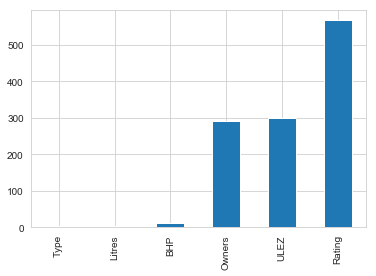

In [7]:
sns.set_style("whitegrid")
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

We can replace empty values for Fuel, Type, Litres and BHP by comparing them with other model/year of cars

In [8]:
df[df['Type'] != df['Type']]

,Make,Model,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
369,Ford,Focus,"1,225",NaN,2005,NaN,"95,811",1.6,NaN,Manual,Petrol,NaN,NaN
421,Ford,Focus,"1,000",NaN,2004,NaN,"109,412",1.6,NaN,Manual,Diesel,NaN,NaN


In [9]:
mask1 = df['Litres'] == 1.6
mask2 = df['Fuel'] == 'Petrol'
mask3 = df['Fuel'] == 'Diesel'

In [10]:
print(df['Make'].unique(), df['Model'].unique())

['Ford'] ['Focus']


In [11]:
df = df.drop(['Make', 'Model'], axis=1)

In [12]:
df2 = df[mask1]
df3 = df2[mask2]
df3[df3['Year'] == 2005]['Type'].value_counts()

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Hatchback    68
Estate        3
Saloon        1
Name: Type, dtype: int64

In [13]:
df3[df3['Year'] == 2004]['Type'].value_counts()

Hatchback    37
Saloon        3
Estate        2
Name: Type, dtype: int64

In [14]:
df['Type'] = df['Type'].fillna('Hatchback')

In [15]:
df[df['Litres'] != df['Litres']]

,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
3,895,NaN,2002,Hatchback,"87,293",NaN,113BHP,Manual,Petrol,1.0,NaN
14,"1,295",NaN,2002,Hatchback,"73,680",NaN,128BHP,Automatic,Petrol,NaN,NaN


In [16]:
mask1 = df['Fuel'] == 'Petrol'
mask2 = df['Year'] == 2002
df2 = df[mask1]
df2[mask2]['Litres'].value_counts()

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


1.6    29
1.8     3
2.0     3
1.4     2
Name: Litres, dtype: int64

In [17]:
df['Litres'] = df['Litres'].fillna(1.6)

In [18]:
df[df['BHP'] != df['BHP']]

,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
4,800,NaN,2003,Hatchback,"78,453",1.6,NaN,Automatic,Petrol,3.0,NaN
116,940,NaN,2005,Hatchback,"108,436",1.8,NaN,Manual,Petrol,NaN,NaN
166,850,NaN,2007,Hatchback,"99,000",1.6,NaN,Manual,Petrol,NaN,NaN
180,895,NaN,2007,Hatchback,"130,000",1.6,NaN,Manual,Petrol,NaN,NaN
216,895,NaN,2007,Hatchback,"130,000",1.6,NaN,Manual,Petrol,NaN,NaN
369,"1,225",NaN,2005,Hatchback,"95,811",1.6,NaN,Manual,Petrol,NaN,NaN
397,"1,195",NaN,2004,Saloon,"109,557",1.6,NaN,Manual,Petrol,5.0,NaN
421,"1,000",NaN,2004,Hatchback,"109,412",1.6,NaN,Manual,Diesel,NaN,NaN
463,"1,190",NaN,2006,MPV,"109,000",1.8,NaN,Manual,Diesel,3.0,NaN
580,"1,490",NaN,2008,Hatchback,"112,000",1.6,NaN,Manual,Petrol,NaN,NaN


In [19]:
df = df.drop(463)

In [20]:
df[df['BHP'] != df['BHP']]

,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
4,800,NaN,2003,Hatchback,"78,453",1.6,NaN,Automatic,Petrol,3.0,NaN
116,940,NaN,2005,Hatchback,"108,436",1.8,NaN,Manual,Petrol,NaN,NaN
166,850,NaN,2007,Hatchback,"99,000",1.6,NaN,Manual,Petrol,NaN,NaN
180,895,NaN,2007,Hatchback,"130,000",1.6,NaN,Manual,Petrol,NaN,NaN
216,895,NaN,2007,Hatchback,"130,000",1.6,NaN,Manual,Petrol,NaN,NaN
369,"1,225",NaN,2005,Hatchback,"95,811",1.6,NaN,Manual,Petrol,NaN,NaN
397,"1,195",NaN,2004,Saloon,"109,557",1.6,NaN,Manual,Petrol,5.0,NaN
421,"1,000",NaN,2004,Hatchback,"109,412",1.6,NaN,Manual,Diesel,NaN,NaN
580,"1,490",NaN,2008,Hatchback,"112,000",1.6,NaN,Manual,Petrol,NaN,NaN
583,"1,489",NaN,2006,Hatchback,"126,000",1.6,NaN,Manual,Petrol,NaN,ULEZ


In [21]:
df2 = df[df.Type == 'Saloon']
df2[df2['Year'] == 2004]

,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
235,"1,490",NaN,2004,Saloon,"45,000",1.6,99BHP,Manual,Petrol,2.0,NaN
397,"1,195",NaN,2004,Saloon,"109,557",1.6,NaN,Manual,Petrol,5.0,NaN
456,"1,000",NaN,2004,Saloon,"79,000",1.6,99BHP,Automatic,Petrol,NaN,NaN


In [22]:
df.at[397, 'BHP'] = '99BHP'

In [23]:
df[df['BHP'] != df['BHP']]

,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
4,800,NaN,2003,Hatchback,"78,453",1.6,NaN,Automatic,Petrol,3.0,NaN
116,940,NaN,2005,Hatchback,"108,436",1.8,NaN,Manual,Petrol,NaN,NaN
166,850,NaN,2007,Hatchback,"99,000",1.6,NaN,Manual,Petrol,NaN,NaN
180,895,NaN,2007,Hatchback,"130,000",1.6,NaN,Manual,Petrol,NaN,NaN
216,895,NaN,2007,Hatchback,"130,000",1.6,NaN,Manual,Petrol,NaN,NaN
369,"1,225",NaN,2005,Hatchback,"95,811",1.6,NaN,Manual,Petrol,NaN,NaN
421,"1,000",NaN,2004,Hatchback,"109,412",1.6,NaN,Manual,Diesel,NaN,NaN
580,"1,490",NaN,2008,Hatchback,"112,000",1.6,NaN,Manual,Petrol,NaN,NaN
583,"1,489",NaN,2006,Hatchback,"126,000",1.6,NaN,Manual,Petrol,NaN,ULEZ


In [24]:
df2 = df[df['Type'] == 'Hatchback']
df3 = df2[df2['Litres'] == 1.6]
df3[df3['Year'] == 2007]['BHP'].value_counts()

99BHP     23
113BHP    21
108BHP     7
89BHP      2
Name: BHP, dtype: int64

In [25]:
df4 = df3[df3['Fuel'] == 'Petrol']
df4[df4['Year'] == 2007]['BHP'].value_counts()

99BHP     23
113BHP    21
Name: BHP, dtype: int64

In [26]:
df.at[[166,180,216], 'BHP'] = '105BHP'

In [27]:
df3[df3['Year'] == 2005]['BHP'].value_counts()

99BHP     43
113BHP    19
100BHP     5
108BHP     4
101BHP     1
89BHP      1
Name: BHP, dtype: int64

In [28]:
df.at[369, 'BHP'] = '99BHP'

In [29]:
df.at[583, 'BHP'] = df3[df3['Year'] == 2006]['BHP'].value_counts().index[0]

In [30]:
df.at[580, 'BHP'] = df3[df3['Year'] == 2008]['BHP'].value_counts().index[0]

In [31]:
df.at[421, 'BHP'] = df3[df3['Year'] == 2004]['BHP'].value_counts().index[0]

In [32]:
df.at[4, 'BHP'] = df3[df3['Year'] == 2003]['BHP'].value_counts().index[0]

In [33]:
df[df['BHP'] != df['BHP']]

,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
116,940,NaN,2005,Hatchback,"108,436",1.8,NaN,Manual,Petrol,NaN,NaN


In [34]:
df3 = df2[df2['Litres'] == 1.8]
df3[df3['Year'] == 2005]['BHP'].value_counts()

113BHP    11
Name: BHP, dtype: int64

In [35]:
df.at[116, 'BHP'] = '113BHP'

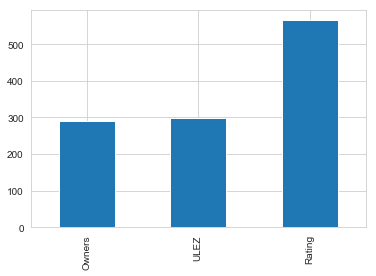

In [36]:
sns.set_style("whitegrid")
missing = df.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [37]:
df['ULEZ'] = df['ULEZ'].fillna(0)

In [38]:
d = {'ULEZ': 1}
df = df.replace({'ULEZ': d})

In [39]:
dfrate = df[df['Rating'] == df['Rating']]
dfrate.drop_duplicates()

,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
10,"13,995",Good price,2018,Hatchback,"12,123",1.0,140PS,Manual,Petrol,NaN,1
32,"9,000",Great price,2016,Hatchback,"23,511",1.0,100PS,Manual,Petrol,1.0,1


In [40]:
ratio = len(dfrate.drop_duplicates())/len(dfrate)
print('The ratio of unique rated cars to rated cars is:', ratio)

The ratio of unique rated cars to rated cars is: 0.03508771929824561


Must be a recurring ad, let's remove the duplicates

In [41]:
df.reset_index(drop=True)

,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
0,550,NaN,2007,Hatchback,"105,030",1.6,99BHP,Manual,Petrol,9.0,1
1,750,NaN,2008,Hatchback,"161,000",1.6,108BHP,Manual,Diesel,4.0,0
2,829,NaN,2003,Estate,"79,000",1.6,99BHP,Manual,Petrol,3.0,0
3,895,NaN,2002,Hatchback,"87,293",1.6,113BHP,Manual,Petrol,1.0,0
4,800,NaN,2003,Hatchback,"78,453",1.6,99BHP,Automatic,Petrol,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
618,800,NaN,2006,Saloon,"99,000",1.6,113BHP,Manual,Petrol,4.0,1
619,"1,195",NaN,2008,Hatchback,"163,000",1.8,113BHP,Manual,Diesel,2.0,0
620,950,NaN,2005,Hatchback,"118,000",1.6,99BHP,Manual,Petrol,7.0,1
621,"1,495",NaN,2007,Hatchback,"92,000",1.8,113BHP,Manual,Diesel,NaN,0


In [42]:
df = df[df['Rating'] != df['Rating']]
df = df.append(dfrate.drop_duplicates(), ignore_index=True)

In [43]:
df

,Price,Rating,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
0,550,NaN,2007,Hatchback,"105,030",1.6,99BHP,Manual,Petrol,9.0,1
1,750,NaN,2008,Hatchback,"161,000",1.6,108BHP,Manual,Diesel,4.0,0
2,829,NaN,2003,Estate,"79,000",1.6,99BHP,Manual,Petrol,3.0,0
3,895,NaN,2002,Hatchback,"87,293",1.6,113BHP,Manual,Petrol,1.0,0
4,800,NaN,2003,Hatchback,"78,453",1.6,99BHP,Automatic,Petrol,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...
563,"1,195",NaN,2008,Hatchback,"163,000",1.8,113BHP,Manual,Diesel,2.0,0
564,950,NaN,2005,Hatchback,"118,000",1.6,99BHP,Manual,Petrol,7.0,1
565,"1,495",NaN,2007,Hatchback,"92,000",1.8,113BHP,Manual,Diesel,NaN,0
566,"13,995",Good price,2018,Hatchback,"12,123",1.0,140PS,Manual,Petrol,NaN,1


In [44]:
df = df.drop('Rating', axis=1)

In [45]:
for i in range(len(df)):
    if 'PS' in df.iloc[i]['BHP']:
        print(i, '\n', df.iloc[i], '\n')

566 
 Price              13,995
Year                 2018
Type            Hatchback
Miles              12,123
Litres                  1
BHP                 140PS
Transmission       Manual
Fuel               Petrol
Owners                NaN
ULEZ                    1
Name: 566, dtype: object 

567 
 Price               9,000
Year                 2016
Type            Hatchback
Miles              23,511
Litres                  1
BHP                 100PS
Transmission       Manual
Fuel               Petrol
Owners                  1
ULEZ                    1
Name: 567, dtype: object 



In [46]:
def ps_to_bhp(num):
    return num/1.014

In [47]:
for i in range(len(df)):
    if 'PS' in df.iloc[i]['BHP']:
        ps = float(df.iloc[i]['BHP'][:-2])
        bhp = ps_to_bhp(ps)
        new = str(bhp) + 'BHP'
        df.at[i, 'BHP'] = new

now to get rid of 'BHP'

In [48]:
for i in range(len(df)):
    df.at[i, 'BHP'] = int(round(float(df.iloc[i]['BHP'][:-3])))

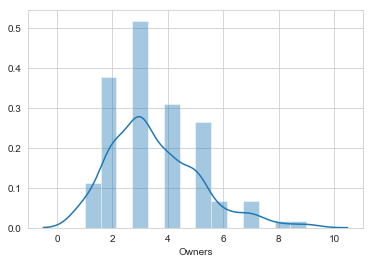

In [49]:
sns.distplot(df.Owners)

In [50]:
df['Price'] = df['Price'].str.replace(',', '')
df['Miles'] = df['Miles'].str.replace(',', '')

In [51]:
df['Price'] = pd.to_numeric(df['Price'], downcast='float')
df['Miles'] = pd.to_numeric(df['Miles'], downcast='float')
df['BHP'] = pd.to_numeric(df['BHP'], downcast='signed')

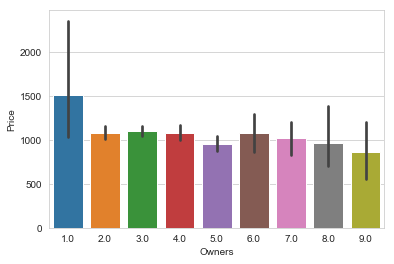

In [52]:
sns.barplot(x='Owners', y='Price', data=df)

In [53]:
dfown = df[df['Owners'] == df['Owners']]
dfown

,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
0,550.0,2007,Hatchback,105030.0,1.6,99,Manual,Petrol,9.0,1
1,750.0,2008,Hatchback,161000.0,1.6,108,Manual,Diesel,4.0,0
2,829.0,2003,Estate,79000.0,1.6,99,Manual,Petrol,3.0,0
3,895.0,2002,Hatchback,87293.0,1.6,113,Manual,Petrol,1.0,0
4,800.0,2003,Hatchback,78453.0,1.6,99,Automatic,Petrol,3.0,0
...,...,...,...,...,...,...,...,...,...,...
561,1485.0,2008,Hatchback,99000.0,1.6,108,Manual,Diesel,3.0,0
562,800.0,2006,Saloon,99000.0,1.6,113,Manual,Petrol,4.0,1
563,1195.0,2008,Hatchback,163000.0,1.8,113,Manual,Diesel,2.0,0
564,950.0,2005,Hatchback,118000.0,1.6,99,Manual,Petrol,7.0,1


In [54]:
np.corrcoef(dfown['Owners'], dfown['Year'])

array([[ 1.       , -0.0118338],
       [-0.0118338,  1.       ]])

In [55]:
dfown['2+_Owners'] = dfown['Owners'] > 1
dfown['1_Owner'] = dfown['Owners'] == 1

/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/patrickfahy99/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
d = {True: 1, False: 0}
dfown= dfown.replace(d)
dfown

,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ,2+_Owners,1_Owner
0,550.0,2007,Hatchback,105030.0,1.6,99,Manual,Petrol,9.0,1,1,0
1,750.0,2008,Hatchback,161000.0,1.6,108,Manual,Diesel,4.0,0,1,0
2,829.0,2003,Estate,79000.0,1.6,99,Manual,Petrol,3.0,0,1,0
3,895.0,2002,Hatchback,87293.0,1.6,113,Manual,Petrol,1.0,0,0,1
4,800.0,2003,Hatchback,78453.0,1.6,99,Automatic,Petrol,3.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
561,1485.0,2008,Hatchback,99000.0,1.6,108,Manual,Diesel,3.0,0,1,0
562,800.0,2006,Saloon,99000.0,1.6,113,Manual,Petrol,4.0,1,1,0
563,1195.0,2008,Hatchback,163000.0,1.8,113,Manual,Diesel,2.0,0,1,0
564,950.0,2005,Hatchback,118000.0,1.6,99,Manual,Petrol,7.0,1,1,0


In [57]:
np.corrcoef(dfown['1_Owner'], dfown['Price'])

array([[1.        , 0.20032429],
       [0.20032429, 1.        ]])

It would be a shame to get rid of the Owners column

In [58]:
dfown.groupby('Year')['Owners'].mean().round()

Year
1999    3.0
2000    3.0
2001    3.0
2002    3.0
2003    4.0
2004    4.0
2005    4.0
2006    4.0
2007    3.0
2008    3.0
2009    3.0
2010    4.0
2011    2.0
2016    1.0
Name: Owners, dtype: float64

In [59]:
df = df.reset_index(drop=True)

In [60]:
df = df.reset_index(drop=True)

In [61]:
df

,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
0,550.0,2007,Hatchback,105030.0,1.6,99,Manual,Petrol,9.0,1
1,750.0,2008,Hatchback,161000.0,1.6,108,Manual,Diesel,4.0,0
2,829.0,2003,Estate,79000.0,1.6,99,Manual,Petrol,3.0,0
3,895.0,2002,Hatchback,87293.0,1.6,113,Manual,Petrol,1.0,0
4,800.0,2003,Hatchback,78453.0,1.6,99,Automatic,Petrol,3.0,0
...,...,...,...,...,...,...,...,...,...,...
563,1195.0,2008,Hatchback,163000.0,1.8,113,Manual,Diesel,2.0,0
564,950.0,2005,Hatchback,118000.0,1.6,99,Manual,Petrol,7.0,1
565,1495.0,2007,Hatchback,92000.0,1.8,113,Manual,Diesel,NaN,0
566,13995.0,2018,Hatchback,12123.0,1.0,138,Manual,Petrol,NaN,1


In [64]:
df = df.reset_index(drop=True)

In [65]:
for i in range(len(df)):
    if df.iloc[i]['Year'] > 2011:
        df = df.drop(i)
df = df.reset_index(drop=True)

In [66]:
d = {1999:3, 2000:3, 2001:3, 2002:3, 2003:4, 2004:4, 2005:4, 2006:4, 2007:3, 2008:3, 2009:3, 2010:4, 2011:2}
df.Owners = df.Owners.fillna(df.Year.apply(lambda x: d.get(x)))

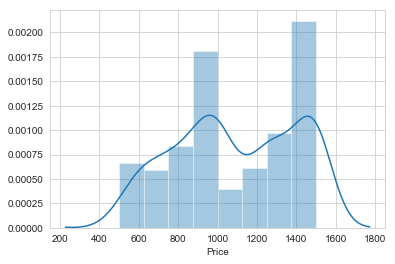

In [67]:
sns.distplot(df.Price)

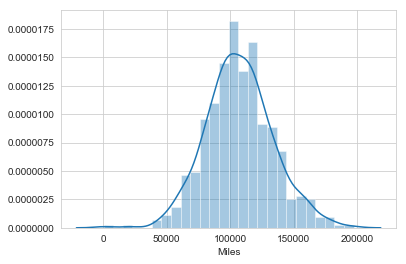

In [68]:
sns.distplot(df.Miles)

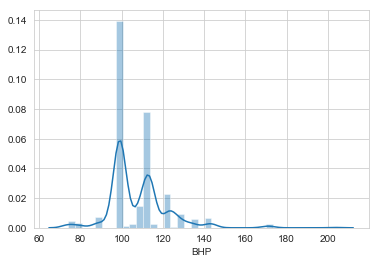

In [69]:
sns.distplot(df.BHP)

In [70]:
df[df.BHP > 150]

,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ
88,1450.0,2005,Hatchback,97000.0,2.0,171,Manual,Petrol,4.0,0
203,1390.0,2003,Hatchback,83000.0,2.0,171,Manual,Petrol,5.0,0
234,899.0,2006,Hatchback,105500.0,2.0,203,Automatic,Petrol,4.0,1
261,1190.0,2004,Hatchback,175000.0,2.0,171,Manual,Petrol,4.0,0
374,1495.0,2003,Hatchback,117000.0,2.0,171,Manual,Petrol,3.0,0
454,1250.0,2004,Hatchback,128246.0,2.0,171,Manual,Petrol,4.0,0


In [71]:
df = df.drop(234)
df = df.reset_index(drop=True)

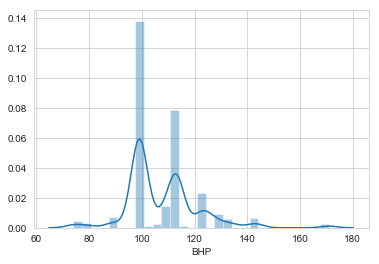

In [72]:
sns.distplot(df.BHP)

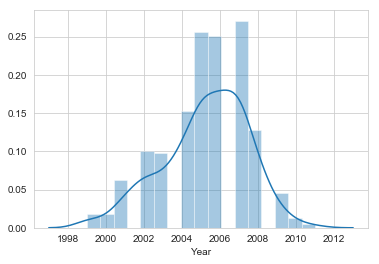

In [73]:
sns.distplot(df.Year)

In [74]:
df['2+_Owners'] = df['Owners'] > 1
df['1_Owner'] = df['Owners'] == 1
d = {True: 1, False: 0}
df= df.replace(d)
df

,Price,Year,Type,Miles,Litres,BHP,Transmission,Fuel,Owners,ULEZ,2+_Owners,1_Owner
0,550.0,2007,Hatchback,105030.0,1.6,99,Manual,Petrol,9.0,1,1,0
1,750.0,2008,Hatchback,161000.0,1.6,108,Manual,Diesel,4.0,0,1,0
2,829.0,2003,Estate,79000.0,1.6,99,Manual,Petrol,3.0,0,1,0
3,895.0,2002,Hatchback,87293.0,1.6,113,Manual,Petrol,1.0,0,0,1
4,800.0,2003,Hatchback,78453.0,1.6,99,Automatic,Petrol,3.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
560,1485.0,2008,Hatchback,99000.0,1.6,108,Manual,Diesel,3.0,0,1,0
561,800.0,2006,Saloon,99000.0,1.6,113,Manual,Petrol,4.0,1,1,0
562,1195.0,2008,Hatchback,163000.0,1.8,113,Manual,Diesel,2.0,0,1,0
563,950.0,2005,Hatchback,118000.0,1.6,99,Manual,Petrol,7.0,1,1,0


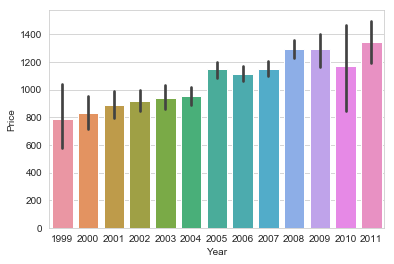

In [75]:
sns.barplot(x='Year', y='Price', data=df)

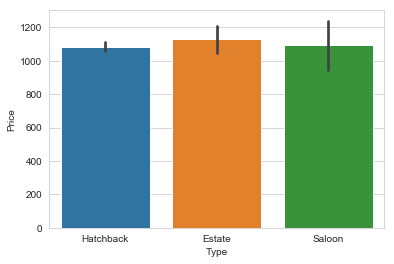

In [76]:
sns.barplot(x='Type', y='Price', data=df)

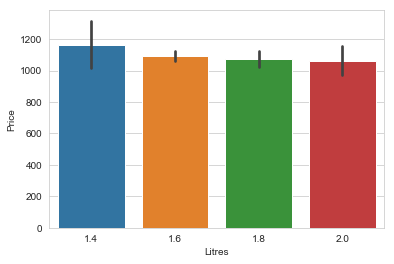

In [77]:
sns.barplot(x='Litres', y='Price', data=df)

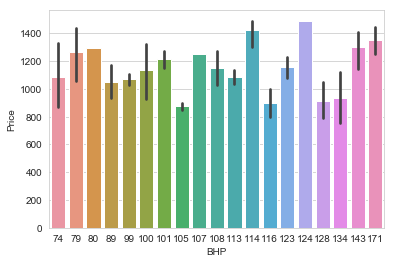

In [78]:
sns.barplot(x='BHP', y='Price', data=df)

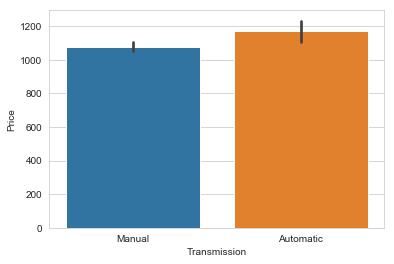

In [79]:
sns.barplot(x='Transmission', y='Price', data=df)

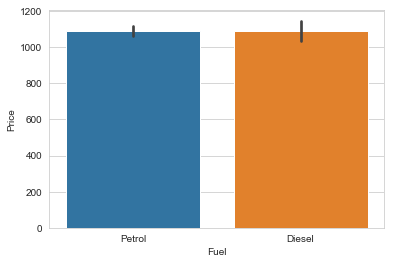

In [80]:
sns.barplot(x='Fuel', y='Price', data=df)

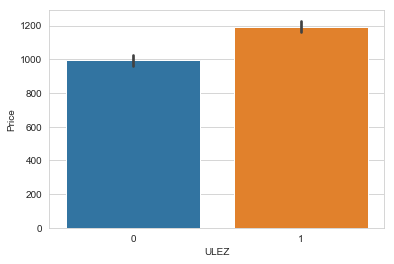

In [81]:
sns.barplot(x='ULEZ', y='Price', data=df)

In [82]:
np.corrcoef(df['ULEZ'], df['Price'])

array([[1.       , 0.3249261],
       [0.3249261, 1.       ]])

In [83]:
df = pd.get_dummies(df, prefix=['Type', 'Transmission', 'Fuel'])

In [84]:
df.to_csv('cleaned_data_fordfocus')